# 2 inputs, 1 output
# Class + Explicit network definition

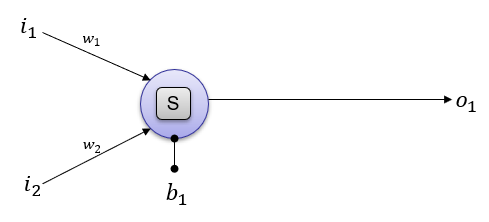

In [1]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_o1_sigmoid_01a.png", width=500)

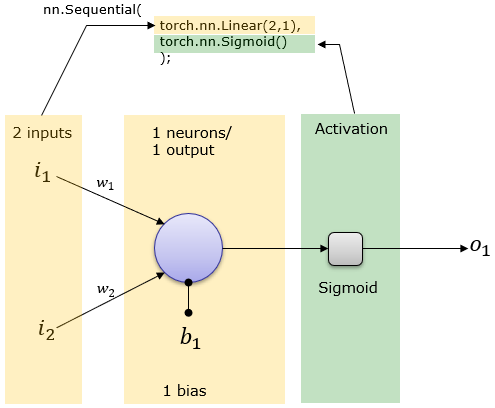

In [2]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_o1_sigmoid_01.png", width=500)

# Prerequisites

In [3]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from draw import display_solution

#predictive
torch.manual_seed(1);

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')  
    
#sigmoid explicit
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#sigmoid pre-defined
activation = torch.nn.Sigmoid()

# Loss (Binary Cross Entropy) error function, explicit def
def bce_err(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#sigmoid + BCELoss (Binary Cross Entropy)
criterion = torch.nn.BCEWithLogitsLoss()

def state(interval,i,loss,out,y):
    if(i%interval == 0):
        print("\n========== Epoch", i,"==========")
        print("loss=",loss)
        accuracy = np.mean( ((out > 0.5)==y).numpy() )
        print("accuracy=",accuracy)
        
#array data points: x1, x2
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [-1,-1,1],
    [-2,10,1],
])          

#df = pd.read_csv('test.csv', header=None)
#df = pd.read_csv('data2.csv', header=None)
#data = df.to_numpy()        

### Class + Explicit network definition

In [4]:
#features
x = torch.from_numpy(data[:, [0,1]]).double()
#target/labels
y = torch.from_numpy(data[:, [2]]).double()

class NN:
    
    def __init__(self, inputUnits, hiddenUnits, outputUnits):
        # Define the size of each layer in our network
        n_input = inputUnits     # Number of input units, must match number of input features
        n_hidden = hiddenUnits   # Number of hidden units 
        n_output = outputUnits   # Number of output units

        # Weights for inputs to hidden layer
        self.w1 = torch.randn(n_input, n_hidden, dtype=torch.double, requires_grad=True)
        # and bias terms for hidden and output layers
        self.b1 = torch.randn(1, n_hidden, dtype=torch.double, requires_grad=True)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self,x):
        o = self.activation(torch.mm(x,self.w1)+(self.b1))
        return o
    
net = NN(2,1,1)
#print(net.forward(x)) 


========== Epoch 0 ==========
loss= tensor(1.9554, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 0.6

========== Epoch 100 ==========
loss= tensor(0.0662, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 200 ==========
loss= tensor(0.0399, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 300 ==========
loss= tensor(0.0285, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 400 ==========
loss= tensor(0.0222, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 500 ==========
loss= tensor(0.0182, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 600 ==========
loss= tensor(0.0154, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 700 ==========
loss= tensor(0.0133, dtype=torch.float64, grad_fn=<MeanBackward0>)
accuracy= 1.0

========== Epoch 800 ==========
loss= tensor(0.0118, dtype=torch.float64, grad_fn=<MeanBa

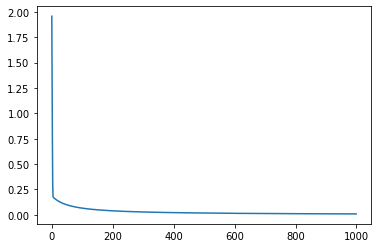

(100,)
(100,)


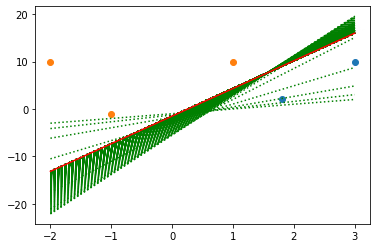

In [5]:
#learn rate
alpha = 0.1
#iterations
epochs = 1000
#display state
fv = 100

lossHistory = []
predictionHistory = []

#optional manually set weights
net.w1 = torch.tensor([[-1],[1]], dtype=torch.float64, requires_grad=True)
net.b1 = torch.tensor([[1]], dtype=torch.float64, requires_grad=True)

w = net.w1
b = net.b1

#copy tensor and detach from the computation graph
ww = w.clone().detach()
bb = b.clone().detach()
predictionHistory.append([ww[0][0].numpy(), ww[1][0].numpy(), bb[0].numpy()])

for i in range(epochs):
    
    #forward: output/prediction
    out = net.forward(x)
    loss = torch.mean(bce_err(out,y))
    
    lossHistory.append(loss)    
    
    #backward: compute gradients
    loss.backward()   

    #update weights
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

        # Manually zero the gradients after updating weights
        w.grad.zero_()
        b.grad.zero_()    
    
    #copy tensor and detach from the computation graph
    ww = w.clone().detach()
    bb = b.clone().detach()
    predictionHistory.append([ww[0][0].numpy(), ww[1][0].numpy(), bb[0].numpy()])
    
    state(fv,i,loss,out,y)

display_solution(data,[net.w1[0].data[0].numpy(), net.w1[1].data[0].numpy(), net.b1[0].data[0].numpy()],predictionHistory,lossHistory,epochs,ylim=None)    